In [1]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

df.shape

(6125, 10)

In [2]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2021-11-13 02:47:46,00:08:42,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),01:19:05,01:19:05,US (United States)


In [3]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)


In [4]:
df.head(1)

,Start Time,Duration,Title
0,2021-11-13 02:47:46,00:08:42,The Loud House Movie


In [5]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [6]:
#Change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

#Convert from UTC timezone to Eastern time
df.index = df.index.tz_convert('US/Eastern')

#reset the index so that the start time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2021-11-12 21:47:46-05:00,00:08:42,The Loud House Movie


In [7]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [13]:
#create a new dataframe called arrow that takes from df
#only the rows in which the Title column contains 'Arrow'
arrow = df[df['Title'].str.contains('Arrow', regex = False)]
arrow.shape

(555, 3)

In [23]:
arrow = arrow[(arrow['Duration'] > '0 days 00:01:00')]
arrow.shape

(328, 3)

In [24]:
arrow['Duration'].sum() #Arrow

Timedelta('6 days 18:45:58')

In [25]:
arrow['Duration'].sum() 

Timedelta('6 days 18:45:58')

In [26]:
arrow['weekday'] = arrow['Start Time'].dt.weekday
arrow['hour'] = arrow['Start Time'].dt.hour

#check to make sure the columns were added correctly
arrow.head(1)

,Start Time,Duration,Title,weekday,hour
462,2022-05-13 02:00:55-04:00,0 days 00:42:39,Arrow: Season 3: My Name is Oliver Queen (Epis...,4,2


In [1]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Arrow Episodes Watched by Hour'}>

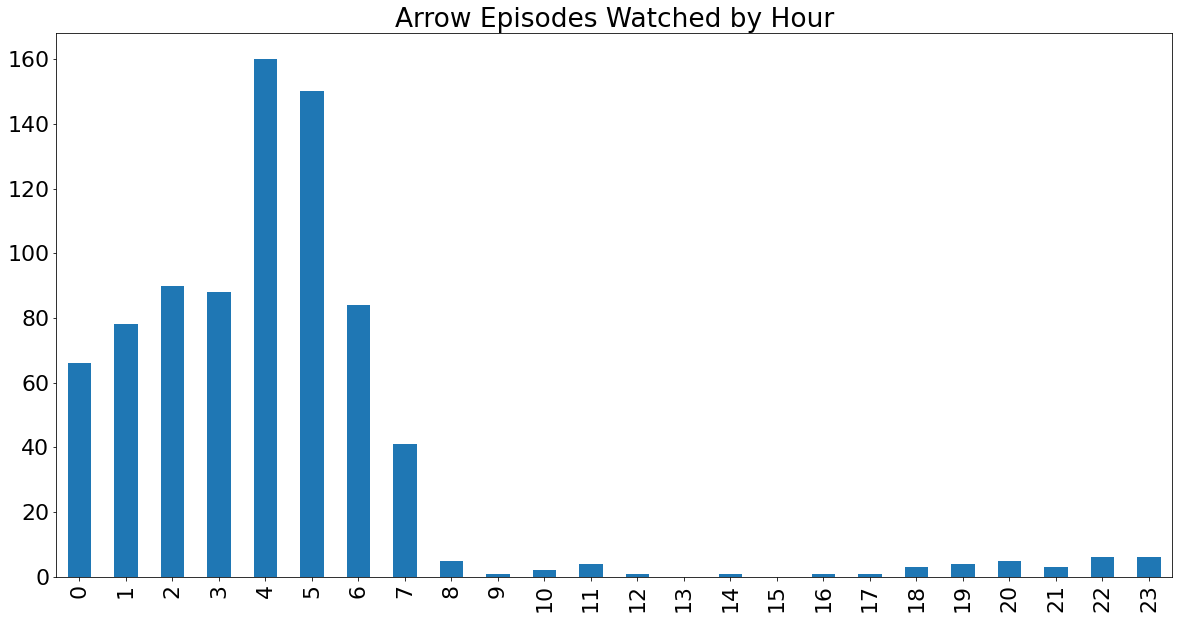

In [17]:
import pandas as pd
%matplotlib inline
import matplotlib

df = pd.read_csv('ViewingActivity.csv')

df.shape

df.head(1)

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head(1)

df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)
df.dtypes

#create a new dataframe called arrow that takes from df only the rows in which the Title column contains 'Arrow'
arrow = df[df['Title'].str.contains('Arrow', regex = False)]
arrow.shape

arrow = arrow[(arrow['Duration'] > '0 days 00:01:00')]
arrow.shape

arrow['Duration'].sum()

arrow['weekday'] = arrow['Start Time'].dt.weekday
arrow['hour'] = arrow['Start Time'].dt.hour

#check to make sure the columns were added correctly
arrow.head(1)

# set our categorical and define the order so the days are plotted Monday-Sunday
arrow['weekday'] = pd.Categorical(arrow['weekday'], categories = [0, 1, 2, 3, 4, 5, 6], ordered = True)

# create arrow_by_day and count the rows for each weekday, assigning the result to that variable
arrow_by_day = arrow['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
arrow_by_day = arrow_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

#plot arrow_by_day as a bar chart with the listed size and title
arrow_by_day.plot(kind = 'bar', figsize = (20, 10), title = 'Arrow Episodes Watched by Day')

# set our categorical and define the order so the hours are plotted 0-23
arrow['hour'] = pd.Categorical(arrow['hour'], categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], ordered = True)

# create arrow_by_hour and count the rows for each hour, assigning the result to that variable
arrow_by_hour = arrow['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
arrow_by_hour = arrow_by_hour.sort_index()

# plot arrow_by_hour as a bar chart with the listed size and title
arrow_by_hour.plot(kind = 'bar', figsize = (20, 10), title = 'Arrow Episodes Watched by Hour')